In [1]:
from netCDF4 import Dataset, MFDataset, num2date
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib as ply
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
archive = ZipFile("../data/SensorNetcdfOutput.zip",'r')
print(archive.namelist())
nc_data = archive.open('air_temperature.nc')
# Dataset(nc_data) # failed to work :()
at_data = Dataset("../data/air_temperature.nc")
at_data

['air_temperature.nc', 'metadata.txt']


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    featureType: timeSeries
    cdm_data_type: Station
    nodc_template_version: NODC_NetCDF_TimeSeries_Orthogonal_Template_v1.0
    standard_name_vocabulary: CF-1.6
    platform: platform
    instrument: instrument
    title: urn:ioos:sensor:gov.usda.nrcs.wcc.snotel:1174:air_temperature
    summary: Sensor observations for urn:ioos:sensor:gov.usda.nrcs.wcc.snotel:1174:air_temperature, feature type timeSeries
    processing_level: none
    date_created: 2019-05-17T18:34:39.039Z
    license: Freely Distributed
    id: 1174
    naming_authority: gov.usda.nrcs.wcc.snotel
    keywords: SnoTel,Fairbanks F.O.,air_temperature
    institution: SnoTel
    acknowledgement: 
    contributor_role: operator
    contributor_name: SnoTel
    publisher_name: SnoTel
    publisher_email: tony.tolsdorf@por.usda.gov
    publisher

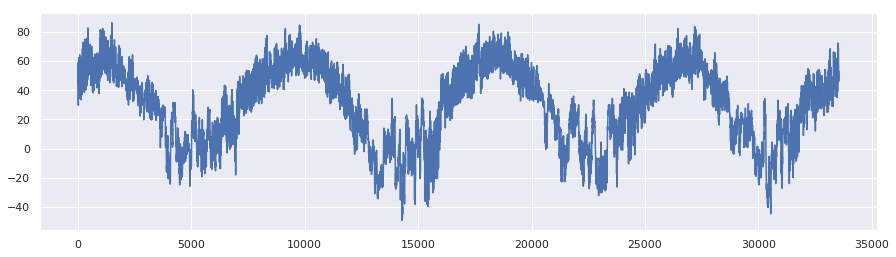

In [3]:
airtemp = at_data.variables['air_temperature']
sns.set(rc={'figure.figsize':(15,4)})
plt.plot(airtemp)

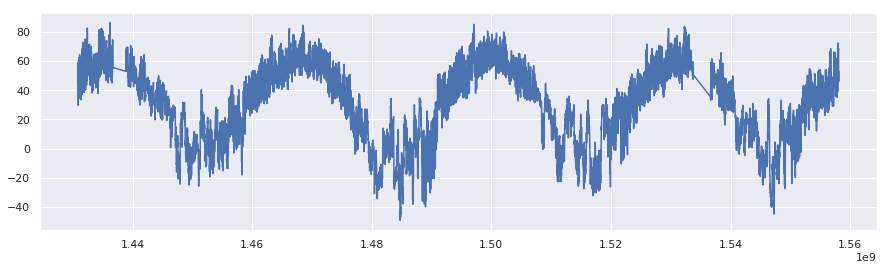

In [4]:
at = pd.DataFrame(at_data.variables['air_temperature'][:],
                  at_data.variables['time'][:])
plt.plot(at)

Dayne and Bax feel like the temp data makes sense.  In first plot we see and recall the rather cold winter from a couple years ago.  The data in second plot with time (as unix time) shows there are a couple data gaps in the dataset.

Next step: Query out a specific time's temperature.

In [5]:
back_then = datetime.now() - timedelta(days=80)
back_then

datetime.datetime(2019, 2, 26, 14, 3, 54, 111023)

/home/dayne/.local/share/virtualenvs/fuelmeter-tools-O4IA74VE/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


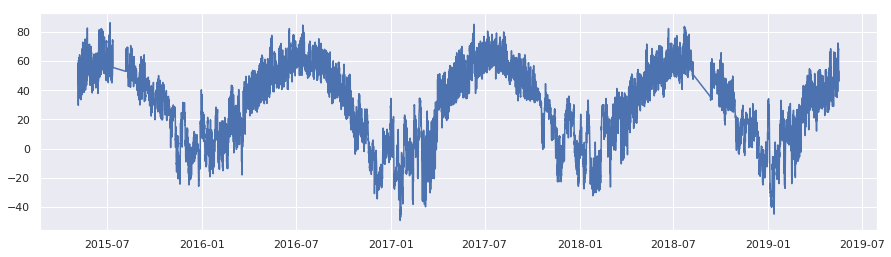

In [6]:
time_var = at_data.variables['time']
at = pd.DataFrame(at_data.variables['air_temperature'][:],
                  num2date(at_data.variables['time'][:], time_var.units))
plt.plot(at)

Looking at this a different way.  
Using this website: http://earthpy.org/pandas_netcdf.html

In [7]:
air_temperature = at_data.variables['air_temperature'][:]
time = at_data.variables['time'][:]

In [8]:
dates = num2date(time[:], time_var.units)
dates_pd = pd.to_datetime(dates)

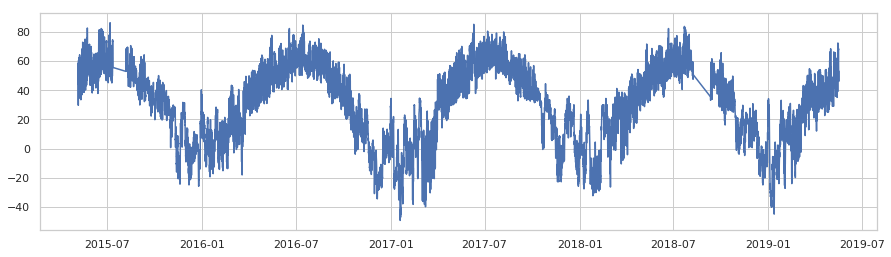

In [19]:
sns.set(style="whitegrid")
sns.lineplot(dates_pd,air_temperature)

In [10]:
df = pd.DataFrame(dates_pd,columns=['Date'])
print(type(dates_pd))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [11]:
df['air_temperature'] = air_temperature[:]
df

,Date,air_temperature
0,2015-05-05 15:00:00,44.42
1,2015-05-05 16:00:00,46.58
2,2015-05-05 17:00:00,49.64
3,2015-05-05 18:00:00,51.80
4,2015-05-05 19:00:00,57.02
5,2015-05-05 20:00:00,58.46
6,2015-05-05 21:00:00,56.48
7,2015-05-05 22:00:00,57.02
8,2015-05-05 23:00:00,55.94
9,2015-05-06 00:00:00,55.04


In [12]:
df = df.set_index('Date')

In [25]:
print(df.loc['2018-10-05 19']['air_temperature'])

41.54


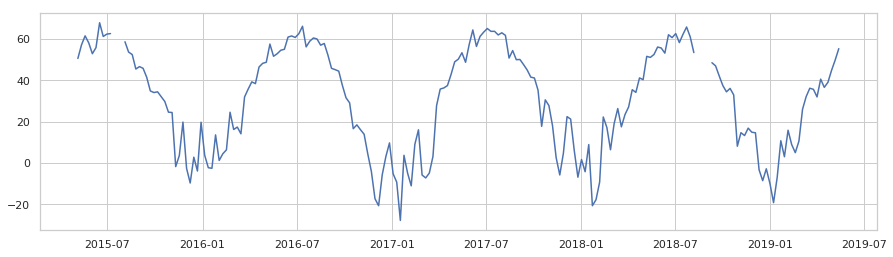

In [40]:
df3d = df.resample('7D').mean()
plt.plot(df3d)